In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [21]:
df_campaign = df[['Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

In [22]:
df_campaign

,Z_CostContact,Z_Revenue,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,3,11,1,0,0,0,0,0
1,3,11,0,0,0,0,0,0
2,3,11,0,0,0,0,0,0
3,3,11,0,0,0,0,0,0
4,3,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,3,11,0,0,0,0,0,0
2236,3,11,0,1,0,0,0,0
2237,3,11,0,0,0,0,1,0
2238,3,11,0,0,0,0,0,0


In [26]:
df_Num= df[['NumDealsPurchases',
            'NumWebPurchases',
            'NumCatalogPurchases', 
            'NumStorePurchases' , 
            'NumWebVisitsMonth']]

In [27]:
df_Num

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2235,2,9,3,4,5
2236,7,8,2,5,7
2237,1,2,3,13,6
2238,2,6,5,10,3


In [30]:
df_Mnt = df[['MntWines', 
             'MntFruits',
             'MntMeatProducts', 
             'MntFishProducts', 
             'MntSweetProducts', 
             'MntGoldProds']]

In [31]:
df_Mnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


## Clustering

<Axes: >

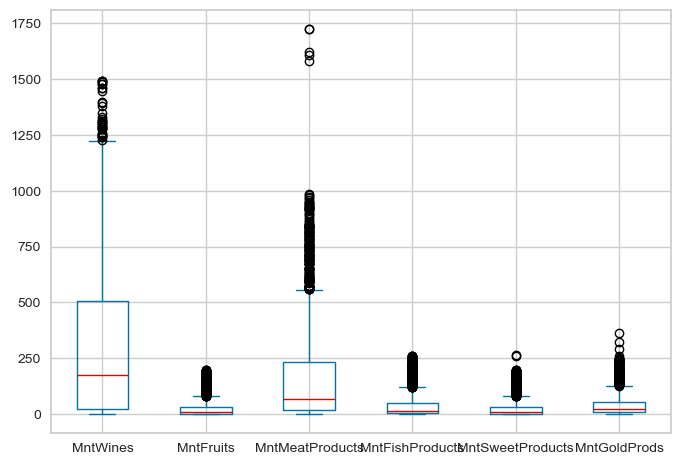

In [34]:
df_Mnt.plot(kind='box')

<Axes: >

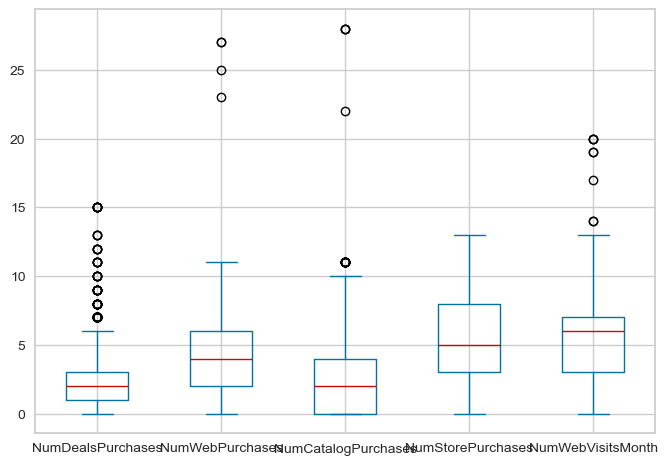

In [35]:
df_Num.plot(kind='box')

In [41]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_Mnt)

'''scale numeric features'''
df_Mnt_scaled = ss.transform(df_Mnt)

df_Mnt_scaled

array([[ 0.98378127,  1.55157698,  1.67970233,  2.46214705,  1.4765001 ,
         0.84320691],
       [-0.87047948, -0.63630116, -0.71322541, -0.65044925, -0.63150318,
        -0.72900579],
       [ 0.36272278,  0.57080402, -0.17703234,  1.34527426, -0.14690472,
        -0.03876607],
       ...,
       [ 1.79502034,  0.545656  ,  0.22178895, -0.10116755, -0.36497403,
        -0.38388593],
       [ 0.36866592,  0.09299156,  0.20849491,  0.77768317,  0.07116458,
         0.32552712],
       [-0.65355475, -0.58600511, -0.46950129, -0.65044925, -0.63150318,
        -0.4414059 ]])

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


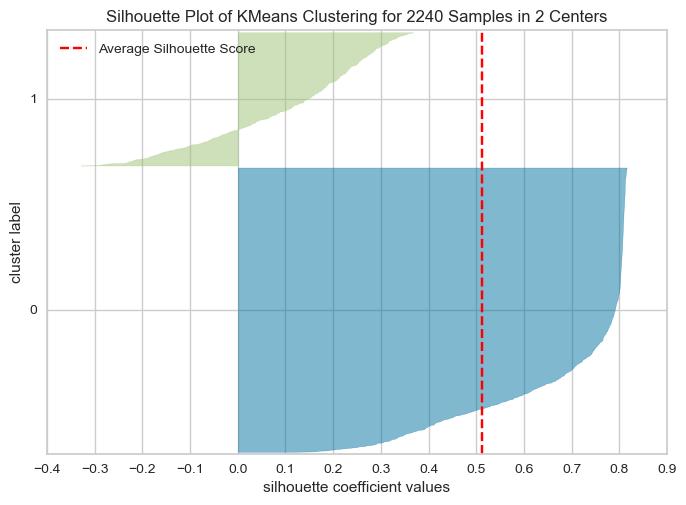

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


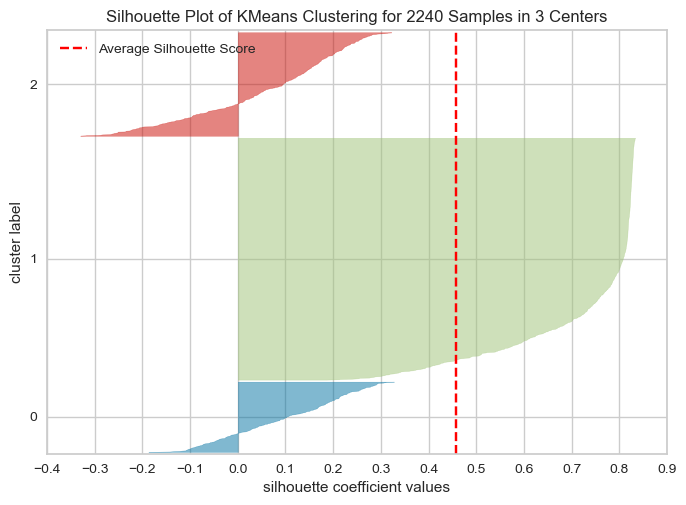

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


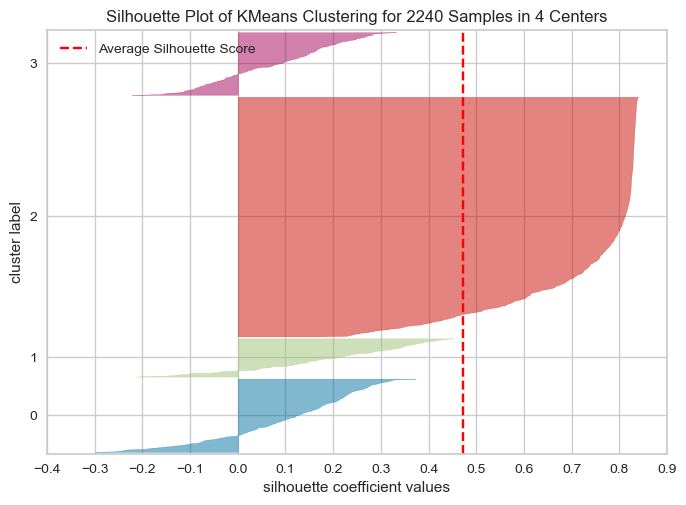

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


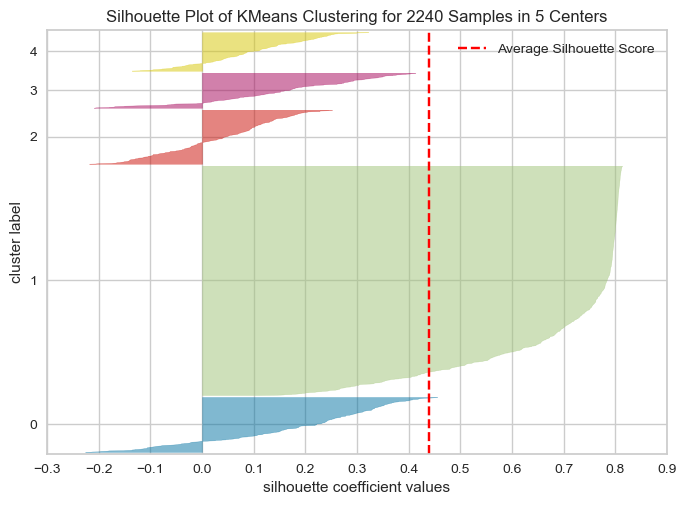

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


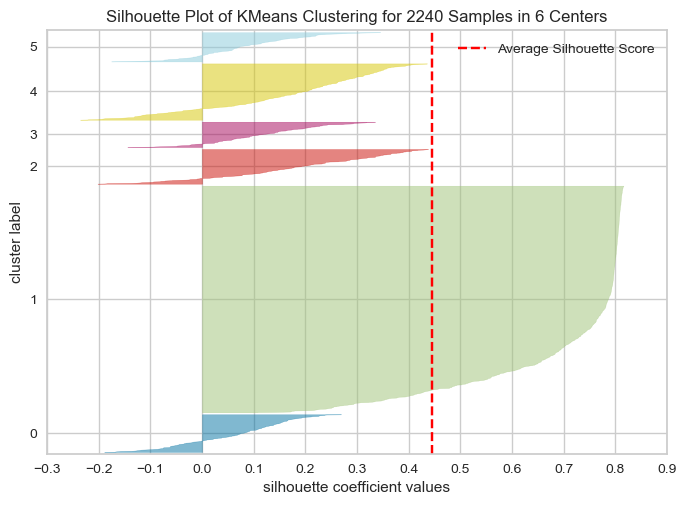

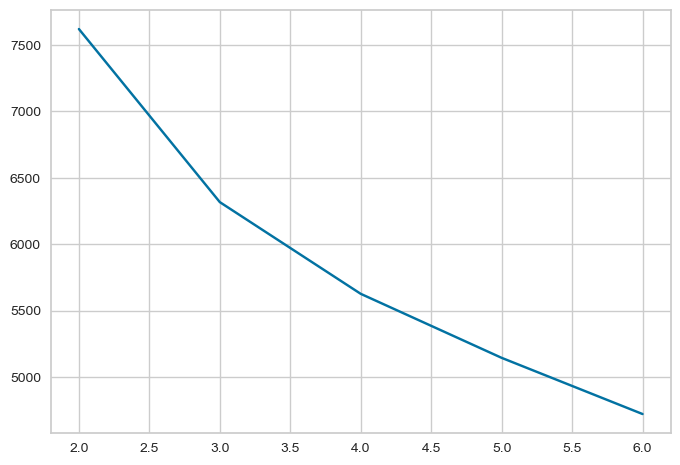

In [44]:
# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,7):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=50).fit(df_Mnt_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_Mnt_scaled)
    silhouette_avg = silhouette_score(df_Mnt_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


plt.plot([x for x in range(2, 7)], inertia_list)


In [45]:
df_Mnt_Num = pd.concat([df_Mnt, df_Num], axis=1)

In [46]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_Mnt_Num)

'''scale numeric features'''
df_Mnt_Num_scaled = ss.transform(df_Mnt_Num)

df_Mnt_Num_scaled

array([[ 0.98378127,  1.55157698,  1.67970233, ...,  2.51089024,
        -0.55078479,  0.69390374],
       [-0.87047948, -0.63630116, -0.71322541, ..., -0.56871962,
        -1.1661254 , -0.13046347],
       [ 0.36272278,  0.57080402, -0.17703234, ..., -0.22654075,
         1.29523705, -0.54264708],
       ...,
       [ 1.79502034,  0.545656  ,  0.22178895, ...,  0.11563813,
         2.21824797,  0.28172013],
       [ 0.36866592,  0.09299156,  0.20849491, ...,  0.79999587,
         1.29523705, -0.95483068],
       [-0.65355475, -0.58600511, -0.46950129, ..., -0.56871962,
        -0.55078479,  0.69390374]])

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


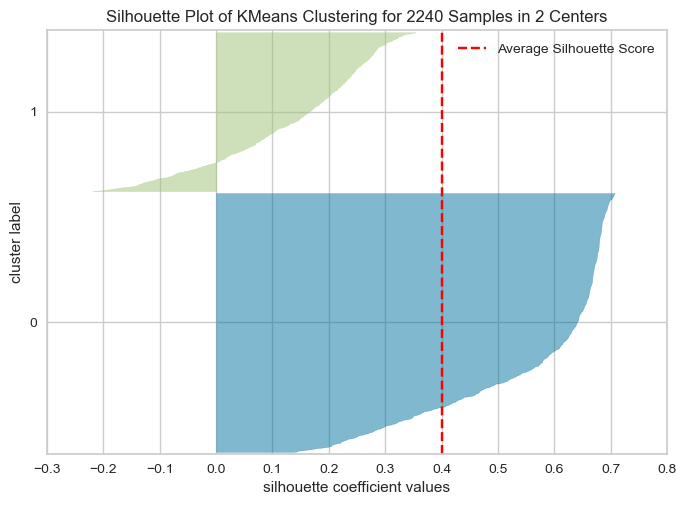

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


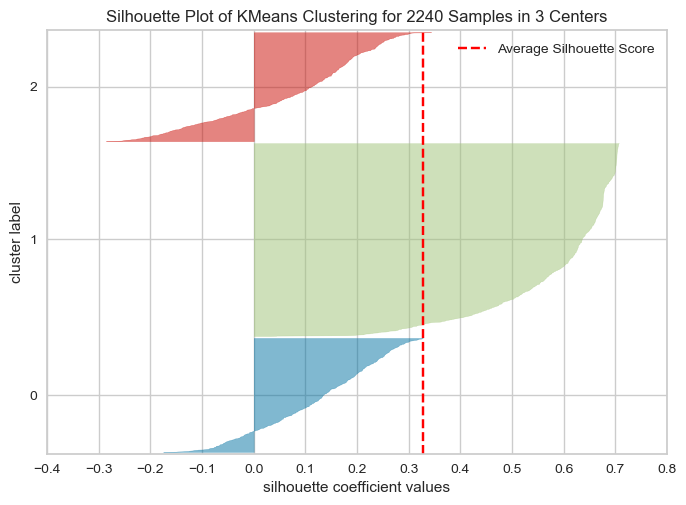

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


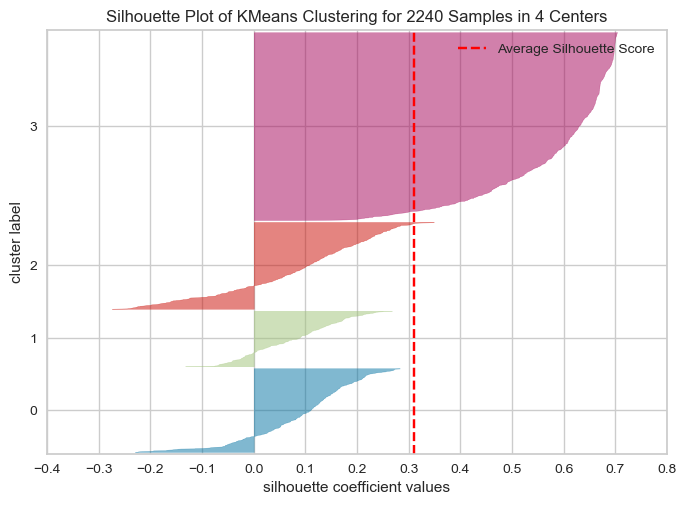

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


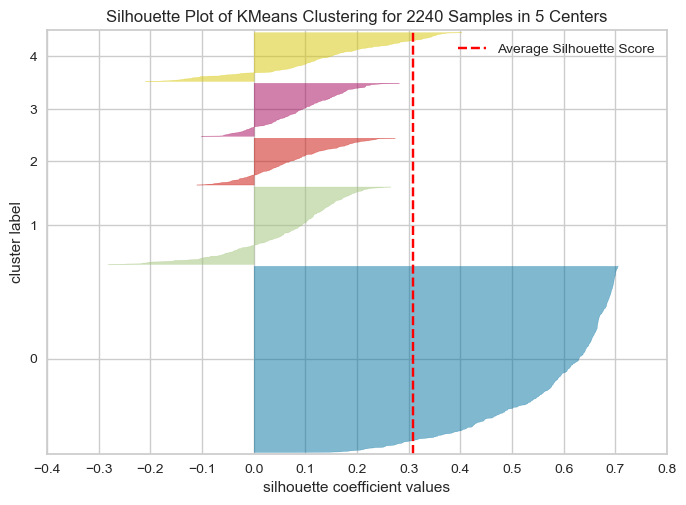

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


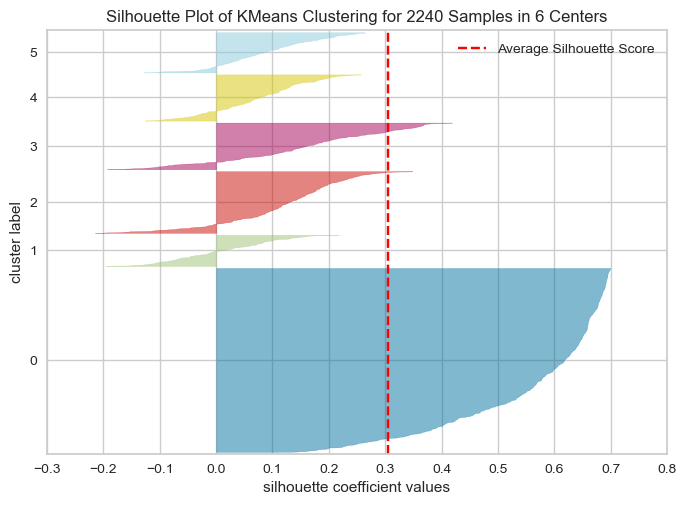

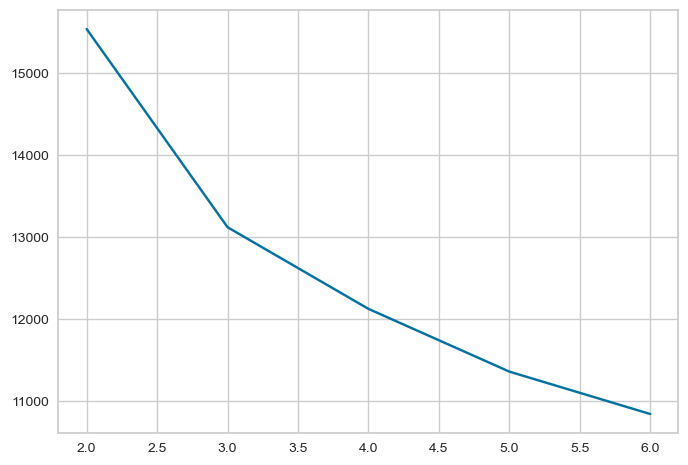

In [48]:
# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,7):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_Mnt_Num_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_Mnt_Num_scaled)
    silhouette_avg = silhouette_score(df_Mnt_Num_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


plt.plot([x for x in range(2, 7)], inertia_list)


In [49]:
df_Mnt_Num_Camp = pd.concat([df_Mnt, df_Num, df_campaign], axis=1)

In [50]:
df_Mnt_Num_Camp

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,635,88,546,172,88,88,3,8,10,4,7,3,11,1,0,0,0,0,0
1,11,1,6,2,1,6,2,1,1,2,5,3,11,0,0,0,0,0,0
2,426,49,127,111,21,42,1,8,2,10,4,3,11,0,0,0,0,0,0
3,11,4,20,10,3,5,2,2,0,4,6,3,11,0,0,0,0,0,0
4,173,43,118,46,27,15,5,5,3,6,5,3,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,2,9,3,4,5,3,11,0,0,0,0,0,0
2236,406,0,30,0,0,8,7,8,2,5,7,3,11,0,1,0,0,0,0
2237,908,48,217,32,12,24,1,2,3,13,6,3,11,0,0,0,0,1,0
2238,428,30,214,80,30,61,2,6,5,10,3,3,11,0,0,0,0,0,0


In [51]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_Mnt_Num_Camp)

'''scale numeric features'''
df_Mnt_Num_Camp_scaled = ss.transform(df_Mnt_Num_Camp)
df_Mnt_Num_Camp_scaled

array([[ 0.98378127,  1.55157698,  1.67970233, ..., -0.28014028,
        -0.28383019, -0.28014028],
       [-0.87047948, -0.63630116, -0.71322541, ..., -0.28014028,
        -0.28383019, -0.28014028],
       [ 0.36272278,  0.57080402, -0.17703234, ..., -0.28014028,
        -0.28383019, -0.28014028],
       ...,
       [ 1.79502034,  0.545656  ,  0.22178895, ..., -0.28014028,
         3.52323341, -0.28014028],
       [ 0.36866592,  0.09299156,  0.20849491, ..., -0.28014028,
        -0.28383019, -0.28014028],
       [-0.65355475, -0.58600511, -0.46950129, ..., -0.28014028,
        -0.28383019, -0.28014028]])

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


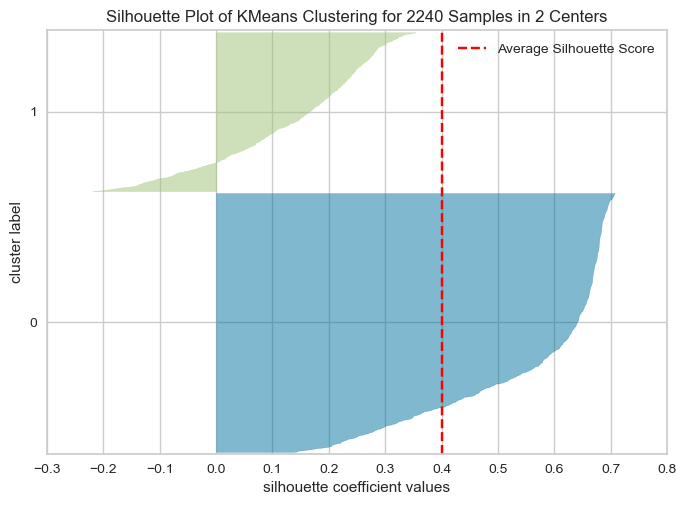

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


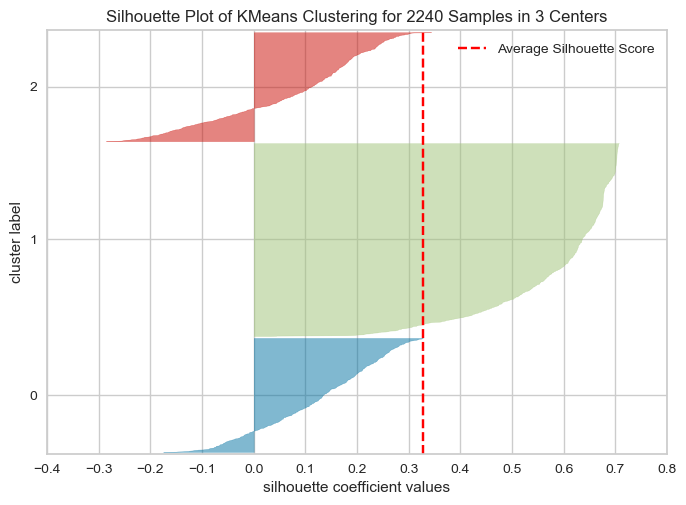

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


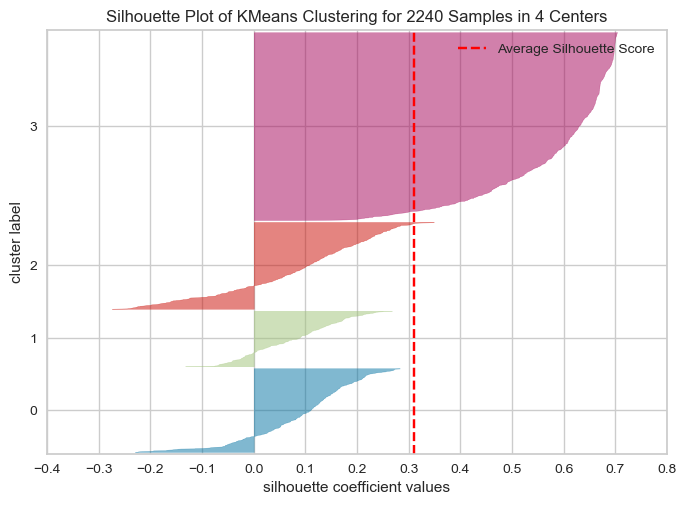

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


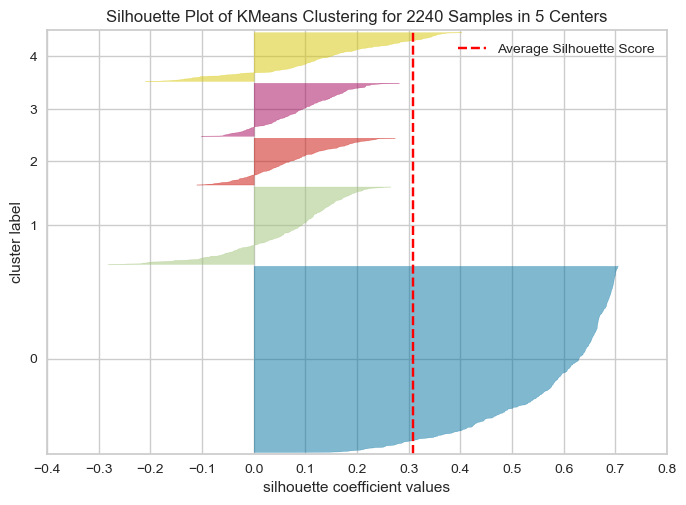

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


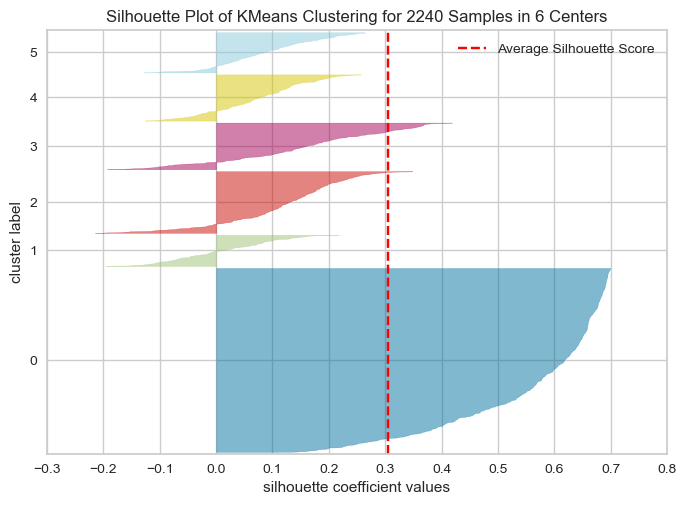

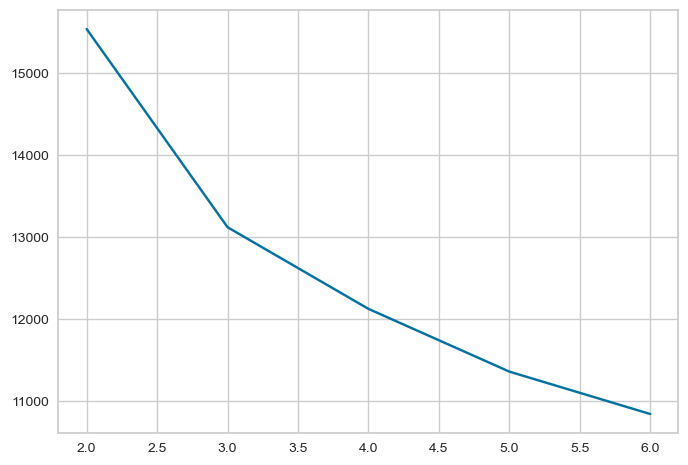

In [52]:
# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,7):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_Mnt_Num_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_Mnt_Num_scaled)
    silhouette_avg = silhouette_score(df_Mnt_Num_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


plt.plot([x for x in range(2, 7)], inertia_list)


# Agglomerative

### df_Mnt_Num_scaled

In [77]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(df_Mnt_Num_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_df_Mnt_Num_scaled = pd.DataFrame(y_hier)
y_hier_df_Mnt_Num_scaled.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_df_Mnt_Num_scaled

,cluster
0,2
1,1
2,0
3,1
4,1
...,...
2235,0
2236,0
2237,2
2238,0


In [78]:
y_hier_df_Mnt_Num_scaled.cluster.value_counts()

cluster
1    1029
0     631
2     580
Name: count, dtype: int64